# Optimizing Circuits for Our Given Hardware

### 1.1 Connecting to the QPU

To start, I define the QPU I want to work with by creating a backend object. Accessing the system requires the correct URL and authentication token.

Since I’m using several Qiskit functions in this lab, the process for connecting to the quantum computer looks slightly different from what I used in earlier exercises.


In [ ]:
from iqm.qiskit_iqm import IQMProvider
import os

os.environ["IQM_TOKEN"] = input()
provider = IQMProvider("https://cocos.resonance.meetiqm.com/garnet")
backend = provider.get_backend()
# Output hidden to protect my API token

### 1.2 Visualizing the Qubits

After connecting to the system, I generated and plotted the device’s connectivity graph to verify that everything was working correctly. In this visualization, each node represents a qubit and each edge indicates a coupling between qubits.

I then compared my connectivity graph with the one published on the IQM Resonance webpage. I looked for similarities and differences — especially the smallest-numbered qubit in each graph — to confirm that my setup and results align with the documented device layout.


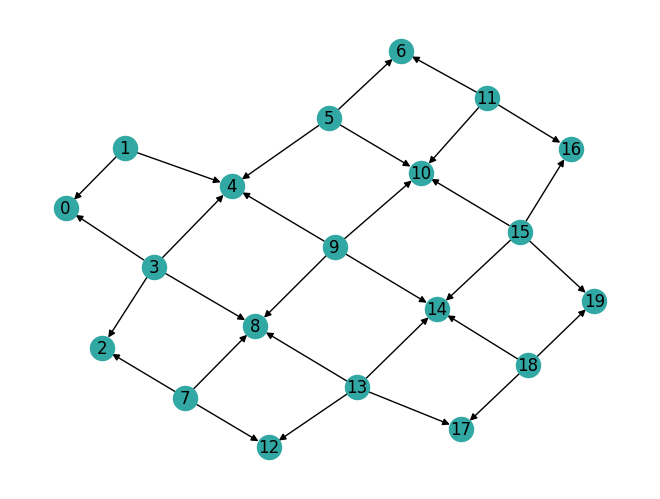

In [9]:
from rustworkx.visualization import mpl_draw
from rustworkx import spring_layout

mpl_draw(backend.coupling_map.graph, arrows=True, with_labels=True, node_color='#32a8a4', pos=spring_layout(backend.coupling_map.graph, num_iter=200))

## 2. Creating a GHZ State

The GHZ (Greenberger–Horne–Zeilinger) state is a maximally entangled quantum state involving three or more qubits. It represents an equal superposition of all qubits being in the 0 state and all qubits being in the 1 state. For this example, I’m using 3 of the 19 qubits available on the system, which gives the target state:

$$\frac{1}{\sqrt{2}} (|000\rangle + |111\rangle)$$

To create this GHZ state, I follow the steps outlined below:


<ol>
<li> First, we initiate the process by <b>creating a superposition</b> using a Hadamard gate <span style="    display: inline-block; min-width: 1.7rem; text-align: center; background: linear-gradient(0.45turn, rgba(255, 255, 255, 0.1), rgba(0, 0, 0, 0.05)) rgb(80, 90, 98); color: white; padding: 0.1rem; margin: 0.05rem; font-weight: 600; border-radius: 0.2rem;">H</span> on a qubit.
</li>
<li>  Then, we <b>apply <span style="display: inline-block; min-width: 1.7rem; text-align: center; background: linear-gradient(0.45turn, rgba(255, 255, 255, 0.1), rgba(0, 0, 0, 0.05)) rgb(80, 90, 98); color: white; padding: 0.1rem; margin: 0.05rem; font-weight: 600; border-radius: 0.2rem;">CNOT</span> gates from one qubit to two other qubits</b>.
</li>
<li> Finally, we perform <b>measurements on all qubits.
</li>
</ol>

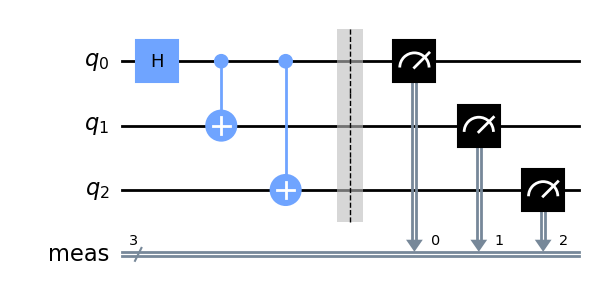

In [11]:
# This syntax differs slightly from earlier examples because I’m using Qiskit.
# Qiskit is required here so that I can apply custom transpilation later.

from qiskit import QuantumCircuit

num_qb = 3

# Create a QuantumCircuit instead of using QuantumVariable
qc = QuantumCircuit(num_qb)

# Apply a Hadamard gate to qubit 0
qc.h(0)

# Apply CNOT gates from qubit 0 to each of the other qubits
for qb in range(1, num_qb):
    qc.cx(0, qb)

# Measure all qubits
qc.measure_all()

# Draw the circuit using a Clifford-style visualization
qc.draw("mpl", style="clifford")


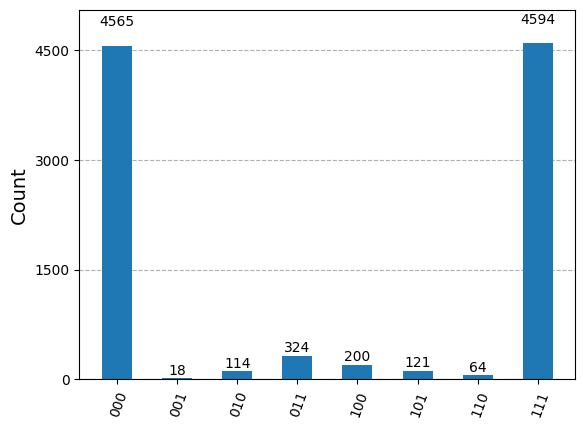

In [12]:
from qiskit.visualization import plot_histogram
from qiskit import transpile

shots = 10000
# again, this looks a little bit different because we're in Qiskit instead of qrisp.
qc_transpiled = transpile(qc, backend=backend)
job = backend.run(qc_transpiled, shots=shots) #transpile the circuit to the qc backend emerald

res=job.result()
counts=res.get_counts()

plot_histogram(counts)

In [6]:
qc_transpiled.draw()

ancilla_0 -> 0 ────────────────────────────────────────────────────────────
                                                                             
  ancilla_1 -> 1 ────────────────────────────────────────────────────────────
                                                                             
  ancilla_2 -> 2 ────────────────────────────────────────────────────────────
                                                                             
  ancilla_3 -> 3 ────────────────────────────────────────────────────────────
                                                                             
  ancilla_4 -> 4 ────────────────────────────────────────────────────────────
                                                                             
  ancilla_5 -> 5 ────────────────────────────────────────────────────────────
                                                                             
  ancilla_6 -> 6 ────────────────────────────────────────────────────────────
                                                                             
  ancilla_7 -> 7 ────────────────────────────────────────────────────────────
                                                                             
  ancilla_8 -> 8 ────────────────────────────────────────────────────────────
                                                                             
  ancilla_9 -> 9 ────────────────────────────────────────────────────────────
                                                                             
ancilla_10 -> 10 ────────────────────────────────────────────────────────────
                                                                             
ancilla_11 -> 11 ────────────────────────────────────────────────────────────
                                                                             
ancilla_12 -> 12 ────────────────────────────────────────────────────────────
                                                                             
ancilla_13 -> 13 ────────────────────────────────────────────────────────────
                                                                             
ancilla_14 -> 14 ────────────────────────────────────────────────────────────
                                                                             
ancilla_15 -> 15 ────────────────────────────────────────────────────────────
                                                                             
ancilla_16 -> 16 ────────────────────────────────────────────────────────────
                                                                             
ancilla_17 -> 17 ────────────────────────────────────────────────────────────
                                                                             
ancilla_18 -> 18 ────────────────────────────────────────────────────────────
                                                                             
ancilla_19 -> 19 ────────────────────────────────────────────────────────────
                                                                             
ancilla_20 -> 20 ────────────────────────────────────────────────────────────
                                                                             
ancilla_21 -> 21 ────────────────────────────────────────────────────────────
                                                                             
ancilla_22 -> 22 ────────────────────────────────────────────────────────────
                                                                             
ancilla_23 -> 23 ────────────────────────────────────────────────────────────
                                                                             
ancilla_24 -> 24 ────────────────────────────────────────────────────────────
                                                                             
ancilla_25 -> 25 ────────────────────────────────────────────────────────────
                        

## 3. Creating the GHZ state on a different set of qubits

When running a circuit with fewer qubits than available, we have the possibility to choose the most performant qubits in the QPU.

**Task: Fill in and execute the two code blocks below to create a GHZ state on two different sets of qubits.**

Use the topology of the system to choose a more efficient set of qubits for a GHZ states. Execute them on the real quantum computer and compare the outcomes.

In [7]:
qubits_names_1 = [
    #Labels for the qubits that we're going to use
    "QB1",
    "QB2",
    "QB5",
]

qubits_names_2 = [
#TODO: Pick another set of 3 qubits, ideally the best-performing ones that you can!
    "QB8",
    "QB9",
    "QB17",
]

# Qiskit identifies qubits with integers, so we need to convert those string by using the IQM Backend method
qubits_1 = [backend.qubit_name_to_index(name) for name in qubits_names_1]
qubits_2 = [backend.qubit_name_to_index(name) for name in qubits_names_2]

# Shows the couplings between the qubits we have selected without showing any of the others.
# Importantly, the first qubit on Qiskit is qubit 0, while the first qubit on Resonance is QB1. So QB1 on Resonance corresponds to qubit 0
#   in Qiskit, and QB5 on Resonance corresponds to QB4 on Qiskit.
reduced_coupling_map_1 = [list(edge) for edge in backend.coupling_map if set(edge).issubset(set(qubits_1))]
print("Reduced coupling map: ", reduced_coupling_map_1)
reduced_coupling_map_2 = [list(edge) for edge in backend.coupling_map if set(edge).issubset(set(qubits_2))]
print("Reduced coupling map: ", reduced_coupling_map_2)

Reduced coupling map:  [[0, 1], [0, 4]]
Reduced coupling map:  [[8, 7], [8, 16]]


Keep in mind the reduced coupling maps above to choose on which qubit you should apply the Hadamard and the CNOT gates.




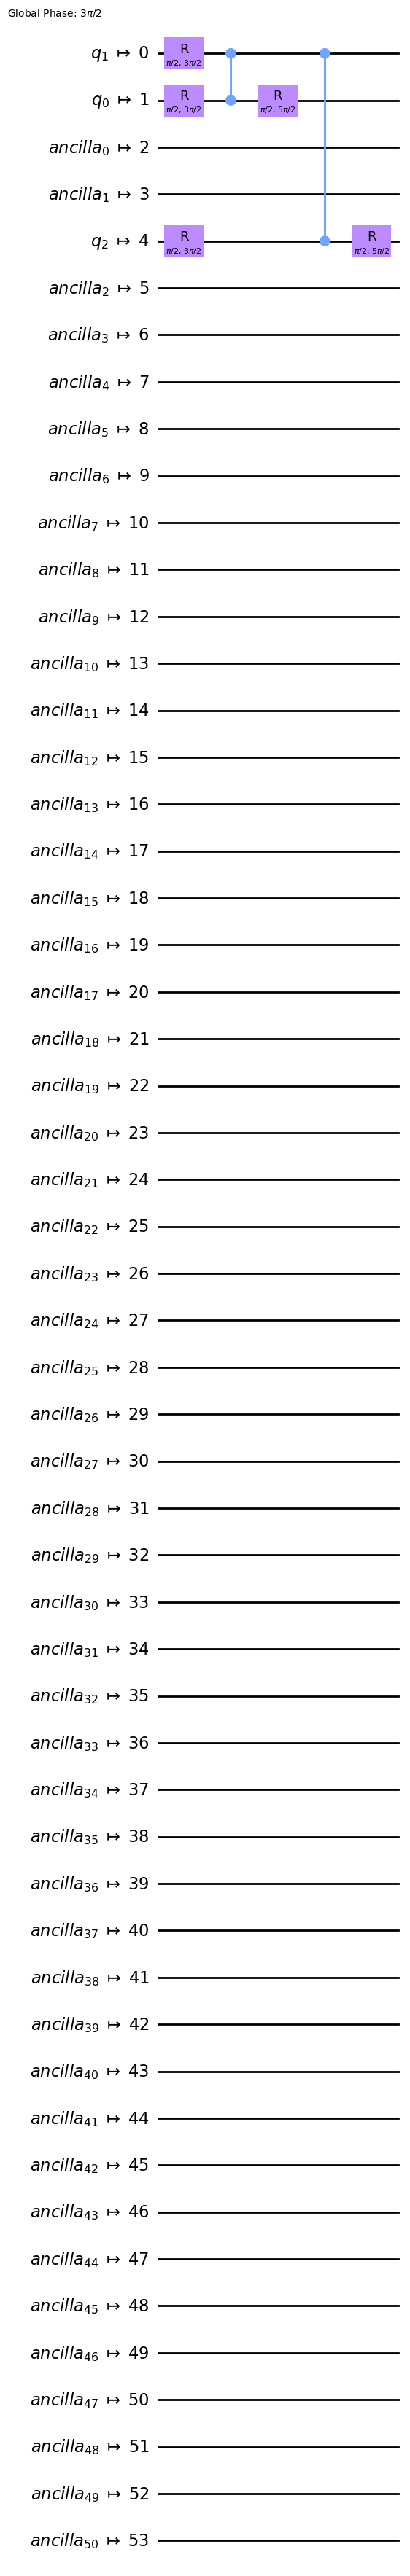

In [9]:
qc1 = QuantumCircuit(num_qb)
# TODO: Add the circuit that acts on qubits_1
qc1.h(1)
qc1.cx(1, 0) #btw QB1 and QB2
qc1.cx(1, 2) #btw QB2 and QB5

qc1.measure
#qc1.draw()
#reduced copling map 1 tells transpiler to work with our specificf qubit
qc1_transpiled = transpile(qc1, backend, coupling_map=reduced_coupling_map_1, optimization_level=3)
qc1_transpiled.draw("mpl", style="clifford")

Copy and adapt the code cell above to make a GHZ state out of the qubits in the set qubits_2.

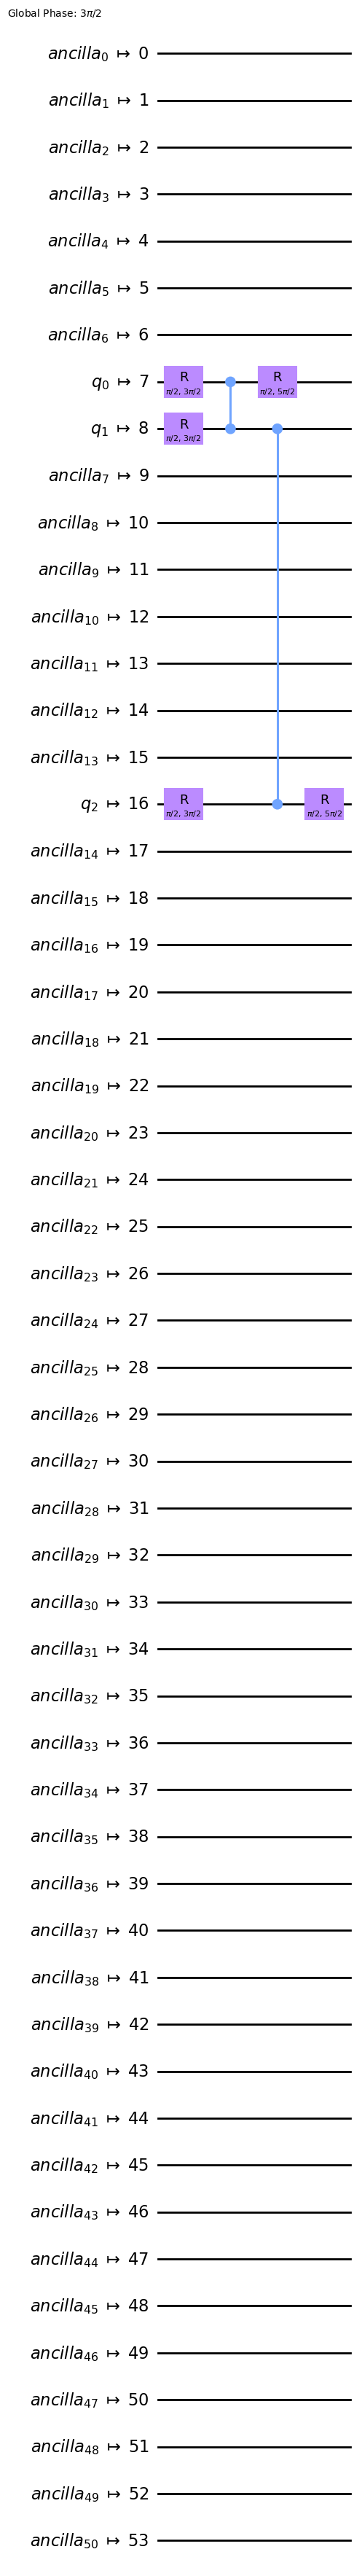

In [10]:
qc1 = QuantumCircuit(num_qb)
# TODO: Add the circuit that acts on qubits_1
qc1.h(1)
qc1.cx(1, 0) #btw QB1 and QB2
qc1.cx(1, 2) #btw QB2 and QB5

#do for qc2
#qc1.draw()
#reduced copling map 1 tells transpiler to work with our specificf qubit
qc1_transpiled = transpile(qc1, backend, coupling_map=reduced_coupling_map_2, optimization_level=3)
qc1_transpiled.draw("mpl", style="clifford")